## PROJECT TEAM ID : PTID-CDS-FEB-1790
## PROJECT ID : PRCL-0015
## CLIENT NAME : BANK GOOD CREDIT 


## BUSINESS CASE:

* Bank GoodCredit wants to predict cred score for current credit card customers.

## DOMAIN ANALYSIS

#### Banking and Credit Industry Overview:
* Credit Risk Management: Banks assess the credit worthiness of customers to determine the risk of default on loans or credit card payments.
* Customer Lifecycle: Understanding the customer lifecycle—from account opening to credit utilization and payment behavior—is crucial for risk assessment.
#### Data Sources:
* Customer Account Data (Cust_Account):
Historical account data including account type, opening date, payment history, balances, and credit limits.
* Customer Enquiry Data (Cust_Enquiry):
Records of customer inquiries including inquiry amounts and purposes, which can indicate potential credit-seeking behavior.
* Customer Demographics Data (Cust_Demographics):
Demographic information such as age, income, and possibly anonymized features that may influence credit behavior.

## Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset from SQL Database

In [2]:
#making connection to database server
connection = mysql.connector.connect(host= '18.136.157.135', 
                                     port= '3306',
                                     user = 'dm_team1',
                                     password = 'DM!$Team&279@20!',
                                     database = 'project_banking')

In [3]:
# Define SQL queries for each table
query_account = "SELECT * FROM Cust_Account"
query_enquiry = "SELECT * FROM Cust_Enquiry"
query_demographics = "SELECT * FROM Cust_Demographics"

# Read data from each table into separate DataFrames
df_account = pd.read_sql(query_account, connection)
df_enquiry = pd.read_sql(query_enquiry, connection)
df_demographics = pd.read_sql(query_demographics, connection)

# Close the database connection
connection.close()

# Display the first few rows of each DataFrame
print("Cust_Account:")
print(df_account.head())

print("\nCust_Enquiry:")
print(df_enquiry.head())

print("\nCust_Demographics:")
print(df_demographics.head())

Cust_Account:
   dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3  20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4  20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt  ... amt_past_due  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900  ...                
1     06-Sep-15               03-Oct-15           16201  ...                
2     31-Aug-15               30-Sep-15           41028  ...                
3                26-Jul-07    31-Jan-09           93473  ...                
4     05-May-15               31-May-15           20250  ...                

                                     paymenthistory1  \
0  """STDSTDSTDXXXXXXXXXXXXXXXSTDX

In [4]:
df_account.shape

(186329, 21)

In [5]:
df_enquiry.shape

(413188, 6)

In [6]:
df_demographics.shape

(23896, 83)

In [7]:
print(list(df_enquiry.columns))

['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose', 'enq_amt']


 * Customer enquiry column doesnot provide significant value to the dataset and we excluded this to streamline the dataset and improve the efficiency of our modeling process.

#### Merging the Account data table and demographics data table together:

In [4]:
df = pd.merge(df_account,df_demographics, on ='customer_no',how='inner')

In [8]:
df.shape

(186329, 103)

In [9]:
df.isnull().sum()

dt_opened_x    0
customer_no    0
upload_dt      0
acct_type      0
owner_indic    0
              ..
feature_76     0
feature_77     0
feature_78     0
feature_79     0
Bad_label      0
Length: 103, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: object(103)
memory usage: 147.8+ MB


In [19]:
pd.set_option('display.max_columns',None)
df.describe()

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928
unique,197,23896,75,31,4,6246,4511,4840,1877,67555,56425,630,18311,11912,234,235,1380,1456,1476,3,18300,197,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,8814,21-Apr-15,10,1,13-Apr-12,,,31-Jul-15,,0,,"""""""0000000000000000000000000000000000000000000...",,01-Jul-15,01-Jan-15,,,,,,16-Nov-15,23-Oct-15,Platinum Maxima,,,3,Card Setup,14,150000,,,,Y,PM1,,12,SA03,AS03,,,1,AAIPKXXXXX,01-Jan-86,98100XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,4627,76,4938,99102,175046,503,25095,107775,12535,8718,88588,183063,44445,106395,16600,5578,135629,149025,159408,120801,143343,4627,1477,74870,19654,19654,112867,183804,183804,5850,174031,174031,183565,175453,73036,106507,77421,68096,9260,174093,183720,176542,160,173,1646,162322,111083,154440,108467,108659,86485,7373,13752,165657,91298,158438,132303,60911,61146,96642,51625,51501,59582,53132,179870,69368,15130,101696,173852,925,139295,183029,102440,82250,84185,83090,183804,176586,86485,166932,179893,175453,181218,183826,183773,12660,74504,74504,6521,158438,132303,60911,132478,69368,128440,162698,183731,183044,183107,16196,177143,183774,177448


In [18]:
pd.set_option('display.max_columns',None)
df.describe(include='O')

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928,183928
unique,197,23896,75,31,4,6246,4511,4840,1877,67555,56425,630,18311,11912,234,235,1380,1456,1476,3,18300,197,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,8814,21-Apr-15,10,1,13-Apr-12,,,31-Jul-15,,0,,"""""""0000000000000000000000000000000000000000000...",,01-Jul-15,01-Jan-15,,,,,,16-Nov-15,23-Oct-15,Platinum Maxima,,,3,Card Setup,14,150000,,,,Y,PM1,,12,SA03,AS03,,,1,AAIPKXXXXX,01-Jan-86,98100XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,4627,76,4938,99102,175046,503,25095,107775,12535,8718,88588,183063,44445,106395,16600,5578,135629,149025,159408,120801,143343,4627,1477,74870,19654,19654,112867,183804,183804,5850,174031,174031,183565,175453,73036,106507,77421,68096,9260,174093,183720,176542,160,173,1646,162322,111083,154440,108467,108659,86485,7373,13752,165657,91298,158438,132303,60911,61146,96642,51625,51501,59582,53132,179870,69368,15130,101696,173852,925,139295,183029,102440,82250,84185,83090,183804,176586,86485,166932,179893,175453,181218,183826,183773,12660,74504,74504,6521,158438,132303,60911,132478,69368,128440,162698,183731,183044,183107,16196,177143,183774,177448


There are no constant columns

In [7]:
df.duplicated().sum()

2401

In [8]:
df.drop_duplicates(inplace=True)

In [13]:
pd.set_option('display.max_columns',None)
df.head()

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,,N,,0,,17-Jun-16,1,13,,N,Y,N,,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,,,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indi

In [14]:
df.tail()

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186328,11-Jun-15,1611,25-May-15,6,1,29-Nov-05,,31-Dec-08,11-Jun-10,26000,0,,"""""""000000000000000000000000000XXXXXXXXXXXXXXX0...",,01-Dec-08,01-Oct-07,,,,,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self

## Exploratory Data Analysis:

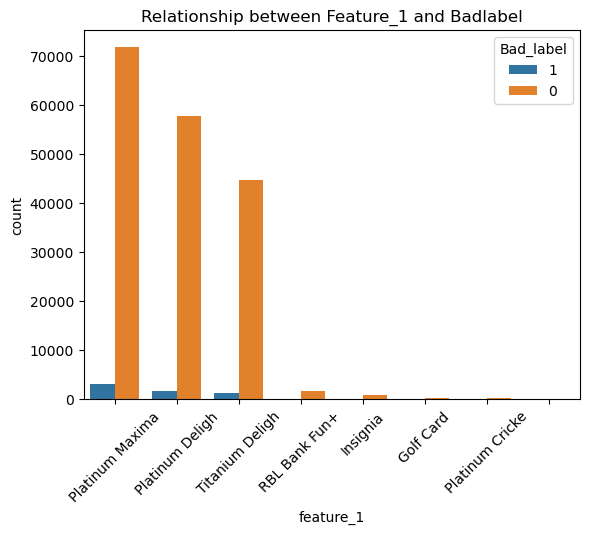

In [16]:
sns.countplot(x=df.feature_1, hue= df.Bad_label)
plt.xticks(rotation= 45)
plt.title('Relationship between Feature_1 and Badlabel')
plt.show()

* From this plot, we can see that feature_1 is a type of creditcards the customers holds. Maximum number of customers own a Platinum maxima, platinum Deligh, Titanium Deligh have good label score.

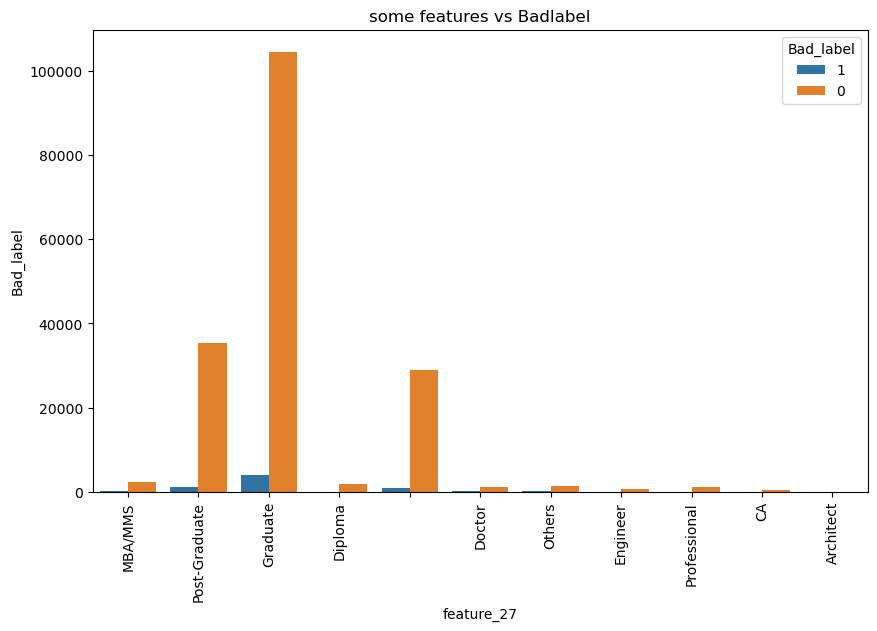

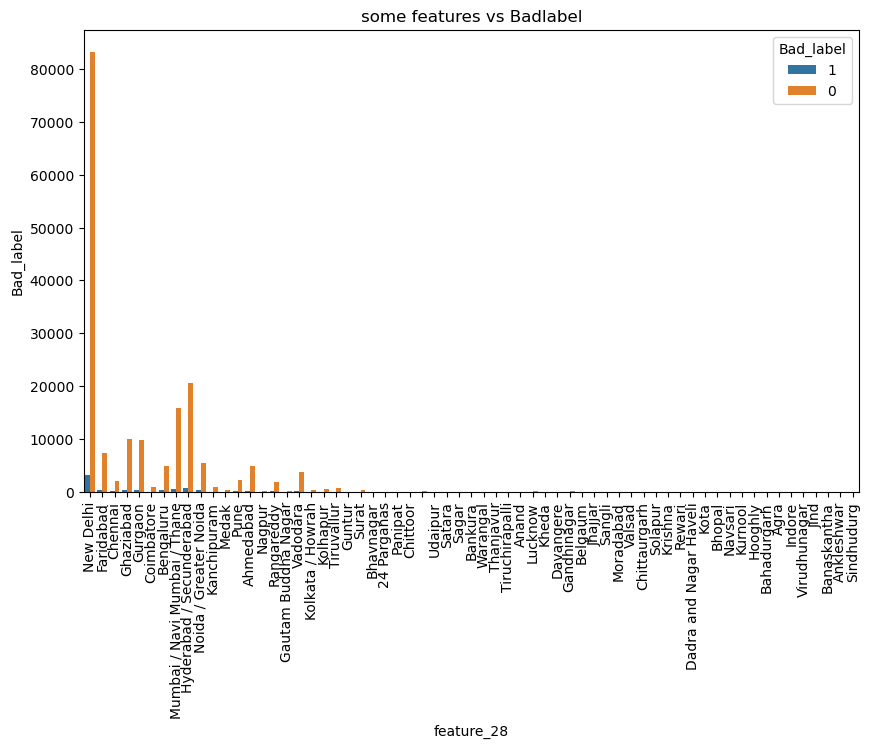

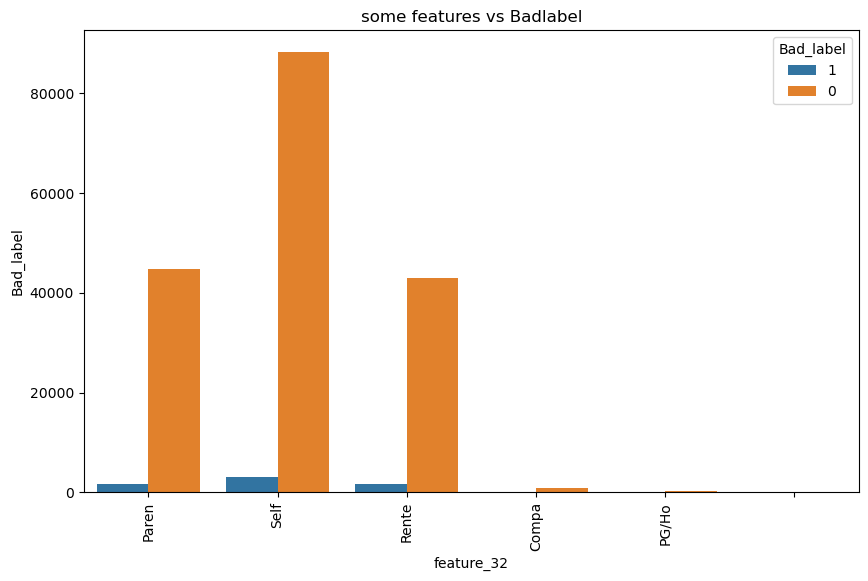

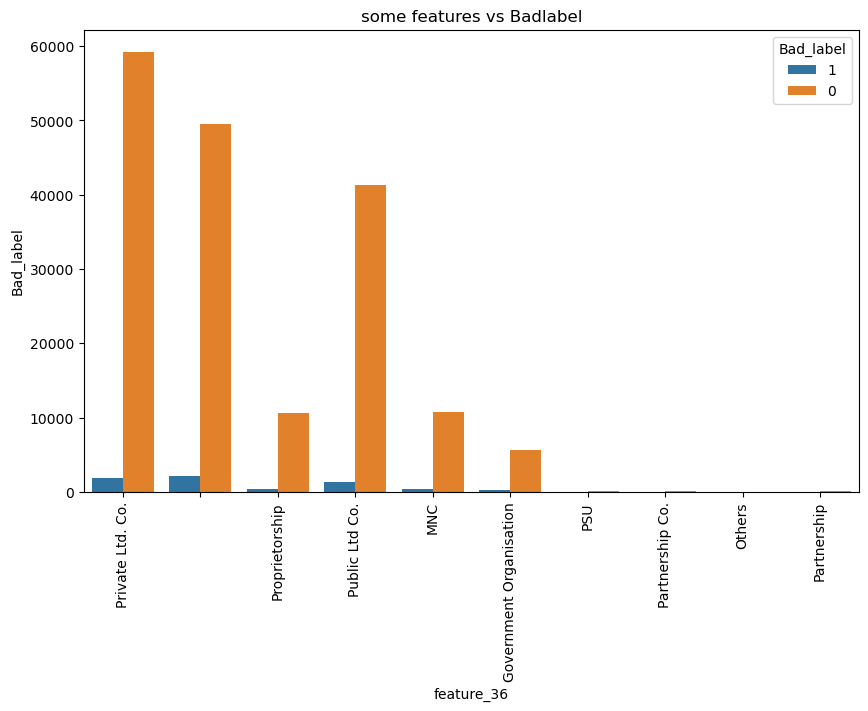

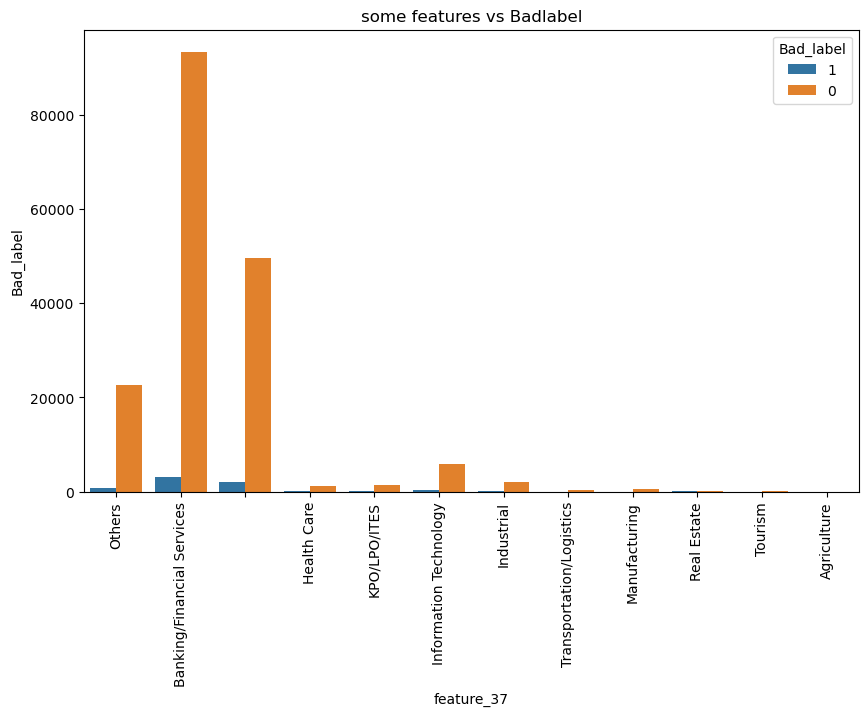

In [27]:
plots = ['feature_27','feature_28','feature_32','feature_36','feature_37']
for i in plots:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=i,hue='Bad_label')
    plt.title('some features vs Badlabel')
    plt.xlabel(i)
    plt.ylabel('Bad_label')
    plt.xticks(rotation=90)
    plt.show()

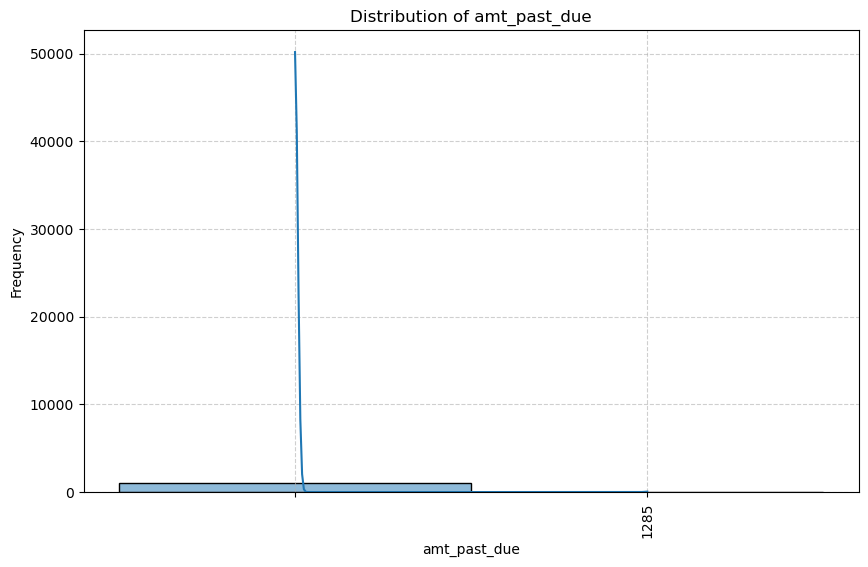

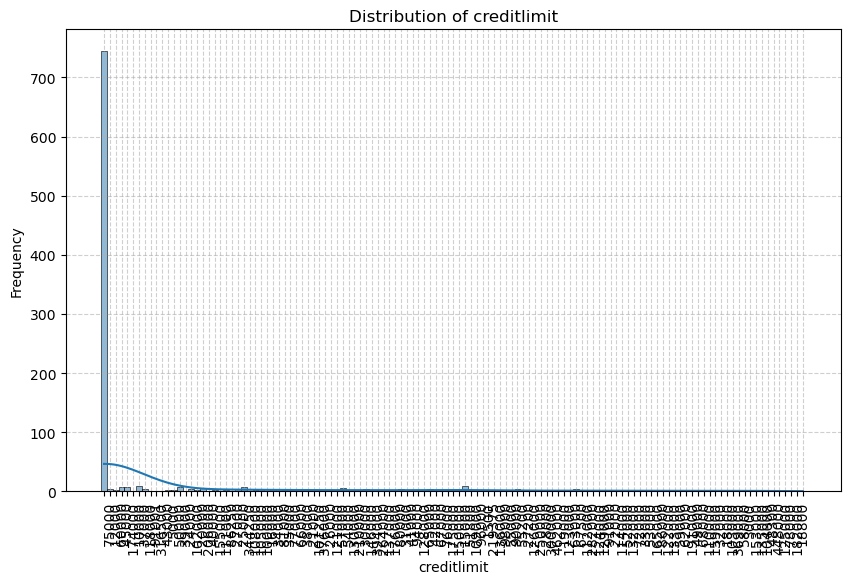

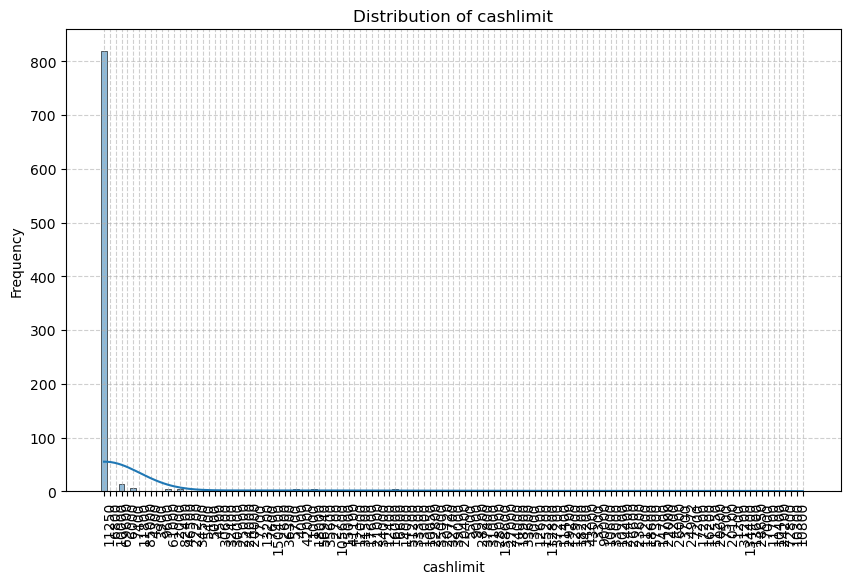

In [20]:
# List of numerical columns to plot
num_cols = ['amt_past_due', 'creditlimit', 'cashlimit']
df_sampled = df.sample(n=1000, random_state=1)
# Loop through each numerical column and create a histogram plot
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sampled[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation =90)
    plt.grid(True, linestyle='--',alpha=0.6)
    plt.show()

### Converting categorical column into numerical column:

In [5]:
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical Columns:" ,cat_col)

Categorical Columns: ['dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic', 'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt', 'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1', 'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'dt_opened_y', 'entry_time', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',

In [14]:
len(cat_col)

90

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in cat_col :
    df[column]=label_encoder.fit_transform(df[column])

df.head()

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,59,2519,45,27,0,1756,4346,721,1795,18592,...,3,2,0,0,1,1,711,1,1,1
1,59,2519,45,2,0,5014,890,0,196,12452,...,3,2,0,0,1,1,711,1,1,1
2,59,2519,45,2,0,4392,4426,0,1795,38145,...,3,2,0,0,1,1,711,1,1,1
3,115,6231,19,2,0,2527,0,4023,1823,65466,...,3,2,0,0,1,1,3123,1,1,1
4,115,6231,19,27,0,3544,708,0,1864,17723,...,3,2,0,0,1,1,3123,1,1,1


### Checking correlation:

In [24]:
df.corr()

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
dt_opened_x,1.000000,0.054008,-0.106361,0.003101,0.002490,-0.001139,-0.001168,0.000986,0.007665,0.001578,...,-0.009584,-0.006955,0.202253,0.007391,0.006789,0.013057,0.027026,-0.021353,0.011771,-0.015788
customer_no,0.054008,1.000000,0.004826,-0.000217,-0.005178,0.000090,0.002397,-0.006624,-0.004677,0.002511,...,0.040658,-0.001938,-0.076579,0.011878,-0.002558,-0.008514,0.005067,-0.007254,0.011932,-0.001466
upload_dt,-0.106361,0.004826,1.000000,0.010244,0.002924,0.002878,-0.002741,-0.000254,-0.000360,0.001883,...,0.016249,0.004945,-0.023662,0.001622,0.000754,-0.006645,-0.010805,0.012658,-0.005068,0.010832
acct_type,0.003101,-0.000217,0.010244,1.000000,0.010573,0.054488,-0.267848,0.204087,0.246163,-0.101547,...,-0.004283,0.028213,0.007046,0.003815,-0.014953,-0.011229,-0.026036,-0.009778,0.000355,0.022746
owner_indic,0.002490,-0.005178,0.002924,0.010573,1.000000,0.038717,0.012882,0.017567,0.080861,-0.000412,...,0.014481,0.017687,0.006615,0.009804,0.015172,0.013475,0.003573,-0.007054,-0.000847,0.002654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_76,0.013057,-0.008514,-0.006645,-0.011229,0.013475,0.000848,0.005760,0.008867,-0.000860,-0.005113,...,0.038648,0.017270,0.004012,-0.001392,0.701070,1.000000,-0.012450,0.022894,0.239407,0.000939
feature_77,0.027026,0.005067,-0.010805,-0.026036,0.003573,-0.000124,0.002782,0.025703,-0.002214,-0.006942,...,-0.024053,-0.002886,0.067485,0.017877,-0.006461,-0.012450,1.000000,-0.036046,-0.032267,-0.006596
feature_78,-0.021353,-0.007254,0.012658,-0.009778,-0.007054,-0.004931,0.000066,-0.004999,-0.002168,0.002021,...,0.039870,0.003889,-0.062945,0.004385,-0.008833,0.022894,-0.036046,1.000000,0.108406,-0.006001
feature_79,0.011771,0.011932,-0.005068,0.000355,-0.000847,-0.002549,0.003419,-0.000280,0.001258,-0.000151,...,0.030654,0.083850,0.008461,0.000539,0.011231,0.239407,-0.032267,0.108406,1.000000,-0.004779


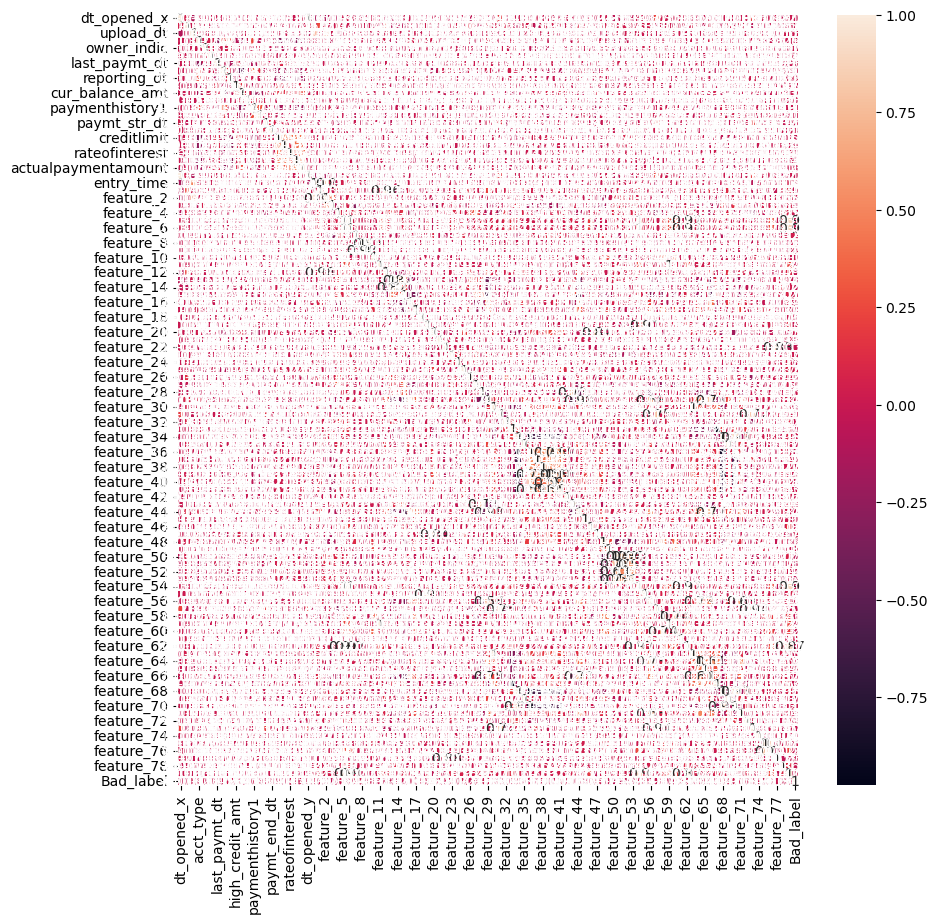

In [25]:
# Plot heattmap for better visualisation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,)
plt.show()

In [26]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['group1','group2','corr']
corrmat

,group1,group2,corr
0,feature_30,feature_63,0.996143
1,feature_63,feature_30,0.996143
2,feature_9,feature_8,0.984310
3,feature_8,feature_9,0.984310
4,feature_44,feature_29,0.976642
5,feature_29,feature_44,0.976642
6,feature_67,feature_33,0.974855
7,feature_33,feature_67,0.974855
8,feature_62,feature_54,0.970123
9,feature_54,feature_62,0.970123


### Drop one of the columns of the highly correlated features

In [7]:
df.drop(['feature_30',
       'feature_8', 'feature_5', 'feature_62', 'feature_29', 'feature_33',
       'feature_12', 'feature_54', 'feature_6', 'feature_79', 'feature_34',
       'feature_68', 'feature_73'],axis=1,inplace=True)

In [23]:
df.shape

(183928, 90)

### Principal Component Analysis(PCA)

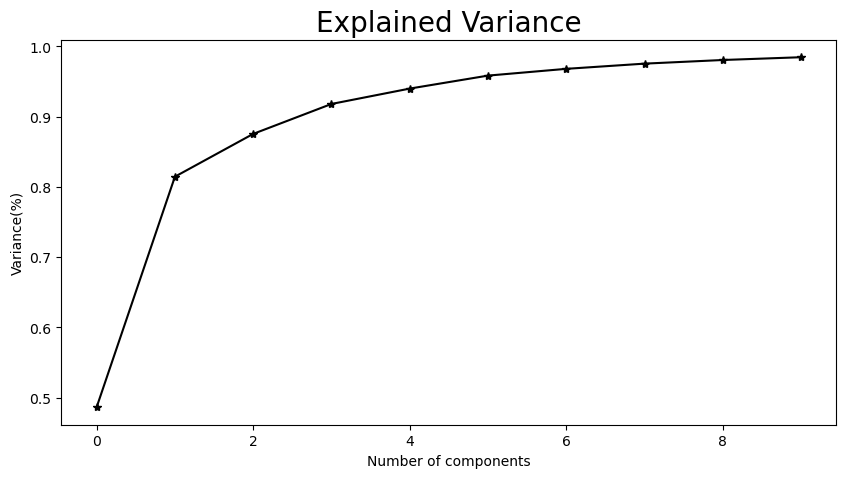

Explained variance ratio: [0.4863241  0.32826504 0.06095    0.04262173 0.02189523 0.01847884
 0.00963269 0.00740639 0.00517722 0.00395489]
Total explained variance: 0.9847061398629656


In [8]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=10)  

# Fit PCA to the scaled data
X_pca = pca.fit_transform(df.drop(columns=['Bad_label']))  

explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') 
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance',fontsize=20)
plt.show()
print("Explained variance ratio:", explained_variance_ratio)
print("Total explained variance:", sum(explained_variance_ratio))

# Now, X_pca contains the transformed features after PCA
# You can use X_pca for further modeling

In [9]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

print(pca_df.head())


            PC1           PC2          PC3          PC4           PC5  \
0 -16367.343653  -6174.864586  9713.885666  9403.857548   1563.962410   
1 -19734.875979   -299.982351  9354.022301 -8195.811331  11134.988551   
2  16044.393273   9799.721326  9509.728142 -1977.722163  -3571.517689   
3  23776.582590 -30326.601007  6016.795060  9003.827481    264.223785   
4 -13056.146781    916.363804  5714.652736 -4160.582406  -2779.470352   

           PC6          PC7          PC8          PC9         PC10  
0  2979.610673 -2712.787670   499.728706  1229.976743  2537.227600  
1   -32.342163   477.416308   409.796672  1169.925635  1634.625022  
2  1097.914114   -85.273331   449.334009  1260.260731  1830.516166  
3 -1474.607798 -3549.646426  1696.680818 -1462.875333  1694.535677  
4 -3031.465663  -865.439507  1656.106529 -1470.898220  1355.932257  


##### Observation:
Based on the explained variance ratio and the total explained variance:

* The first principal component explains about 48.61% of the variance.
* The second principal component explains about 32.86% of the variance.
* Together, the first two components explain approximately 81.47% of the variance.
* Given that the total explained variance with 10 components is 98.47%, it indicates that these components capture most of the important information in the dataset.

### MODEL CREATION

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = pca_df[['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']]  # Features
y = df['Bad_label']     # Target variable


In [12]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(df['Bad_label'].value_counts())

0    179716
1      6613
Name: Bad_label, dtype: int64


## 1.Random Forest Classifier:

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy Score for Random Forest Classifier:", accuracy)
print("Precision Score for Random Forest Classifier:", precision)
print("Recall Score for Random Forest Classifier:", recall)
print("F1 Score for Random Forest Classifier:", f1)
print("Confusion Matrix for Random Forest Classifier:\n", conf_matrix)


Accuracy Score for Random Forest Classifier: 0.968791928299254
Precision Score for Random Forest Classifier: 1.0
Recall Score for Random Forest Classifier: 0.08712715855572999
F1 Score for Random Forest Classifier: 0.16028880866425993
Confusion Matrix for Random Forest Classifier:
 [[35992     0]
 [ 1163   111]]


* We obtained an accuracy of 96.88% and precision of 1.0, indicating the model's overall performance and correctness in predicting the positive class. 
* However, the recall is low at 8.71%, suggesting that the model misses many actual positive cases. This imbalance in performance stems from the highly imbalanced dataset. 
* To address this issue and improve the model's ability to detect positive cases, we applied SMOTE (Synthetic Minority Over-sampling Technique). 
* SMOTE helps balance the dataset by generating synthetic samples for the minority class, enhancing the model's training and enabling it to better generalize to minority class instances.

In [15]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf_smote = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf_smote)
precision = precision_score(y_test, y_pred_rf_smote)
recall = recall_score(y_test, y_pred_rf_smote)
f1 = f1_score(y_test, y_pred_rf_smote)
conf_matrix = confusion_matrix(y_test, y_pred_rf_smote)

print("Accuracy Score for Random Forest Classifier with SMOTE:", accuracy)
print("Precision Score for Random Forest Classifier with SMOTE:", precision)
print("Recall Score for Random Forest Classifier with SMOTE:", recall)
print("F1 Score for Random Forest Classifier with SMOTE:", f1)
print("Confusion Matrix for Random Forest Classifier with SMOTE:\n", conf_matrix)

Accuracy Score for Random Forest Classifier with SMOTE: 0.9491493586647346
Precision Score for Random Forest Classifier with SMOTE: 0.2777380100214746
Recall Score for Random Forest Classifier with SMOTE: 0.304552590266876
F1 Score for Random Forest Classifier with SMOTE: 0.29052789217521524
Confusion Matrix for Random Forest Classifier with SMOTE:
 [[34983  1009]
 [  886   388]]


The model's accuracy has decreased slightly, but the recall has improved significantly, indicating that the model is now better at identifying positive cases. However, precision has decreased, suggesting that there might be more false positives

## 2.Gradient Boosting:

In [36]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 5.4 MB/s eta 0:00:19
   ---------------------------------------- 0.6/99.8 MB 5.8 MB/s eta 0:00:18
   ---------------------------------------- 0.8/99.8 MB 6.0 MB/s eta 0:00:17
   ---------------------------------------- 1.2/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.4/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.7/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 2.0/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 2.2/99.8 MB 6.4 MB/s eta 0:00:16
    --------------------------------------- 2.5/99.8 MB 6.3 MB/s eta 0:00:16
   - ---------------------------

In [25]:
import xgboost as xgb
# Initialize the XGBoost classifier with class weights
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy Score for XGBoost Classifier:", accuracy)
print("Precision Score for XGBoost Classifier:", precision)
print("Recall Score for XGBoost Classifier:", recall)
print("F1 Score for XGBoost Classifier:", f1)
print("Confusion Matrix for XGBoost Classifier:\n", conf_matrix)

Accuracy Score for XGBoost Classifier: 0.9600391453270266
Precision Score for XGBoost Classifier: 0.42843601895734595
Recall Score for XGBoost Classifier: 0.34268385140257773
F1 Score for XGBoost Classifier: 0.38079191238416177
Confusion Matrix for XGBoost Classifier:
 [[34864   603]
 [  867   452]]


The XGBoost model shows improved precision compared to the Random Forest Classifier with SMOTE, indicating fewer false positive predictions. However, the recall is slightly lower, suggesting that it identifies fewer positive cases. Overall, the model achieves a good balance between precision and recall.


XGBOOST with SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


import xgboost as xgb
# Initialize the XGBoost classifier with class weights
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_xgb_smote = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_smote)
precision = precision_score(y_test, y_pred_xgb_smote)
recall = recall_score(y_test, y_pred_xgb_smote)
f1 = f1_score(y_test, y_pred_xgb_smote)
conf_matrix = confusion_matrix(y_test, y_pred_xgb_smote)

print("Accuracy Score for XGBoost Classifier With SMOTE:", accuracy)
print("Precision Score for XGBoost Classifier With SMOTE:", precision)
print("Recall Score for XGBoost Classifier With SMOTE :", recall)
print("F1 Score for XGBoost Classifier With SMOTE:", f1)
print("Confusion Matrix for XGBoost Classifier With SMOTE :\n", conf_matrix)


Accuracy Score for XGBoost Classifier With SMOTE: 0.37548972253528684
Precision Score for XGBoost Classifier With SMOTE: 0.04500517063081696
Recall Score for XGBoost Classifier With SMOTE : 0.8540031397174255
F1 Score for XGBoost Classifier With SMOTE: 0.08550434201736808
Confusion Matrix for XGBoost Classifier With SMOTE :
 [[12905 23087]
 [  186  1088]]


## 3. Support Vector Machine

In [26]:
from sklearn.svm import SVC
# Initialize SVM Classifier
svm_classifier = SVC(kernel='rbf',probability=False, random_state=42)

# Train the model
svm_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)


In [27]:
 # Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Print the evaluation metrics
print("Accuracy Score for SVM Classifier:", accuracy)
print("Precision Score for SVM Classifier:", precision)
print("Recall Score for SVM Classifier:", recall)
print("F1 Score for SVM Classifier:", f1)
print("Confusion Matrix for SVM Classifier:")
print(conf_matrix)

Accuracy Score for SVM Classifier: 0.5685858750611645
Precision Score for SVM Classifier: 0.04313971742543171
Recall Score for SVM Classifier: 0.5208491281273692
F1 Score for SVM Classifier: 0.07967988865692414
Confusion Matrix for SVM Classifier:
[[20229 15238]
 [  632   687]]


In [ ]:
The Accuracy , precison and recall score dropped drastically with this model indicating an average  model's overall 
performance, poor correctness in predicting the positive class and the model misses many actual positive cases. 

## 4. Artificial Neural Network:

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400]
}

# Initialize Neural Network Classifier
nn_classifier = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(nn_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Initialize Neural Network Classifier with best parameters
best_nn_classifier = grid_search.best_estimator_

# Train the model with best parameters
best_nn_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_nn = best_nn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Print the evaluation metrics
print("Accuracy Score for Neural Network Classifier:", accuracy)
print("Precision Score for Neural Network Classifier:", precision)
print("Recall Score for Neural Network Classifier:", recall)
print("F1 Score for Neural Network Classifier:", f1)
print("Confusion Matrix for Neural Network Classifier:")
print(conf_matrix)


Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'max_iter': 200}
Accuracy Score for Neural Network Classifier: 0.6146084903128858
Precision Score for Neural Network Classifier: 0.046814404432132965
Recall Score for Neural Network Classifier: 0.5306122448979592
F1 Score for Neural Network Classifier: 0.08603792796232661
Confusion Matrix for Neural Network Classifier:
[[22228 13764]
 [  598   676]]


In [ ]:
The Accuracy of ANN slightly increased compared to SVM but still low compared with the RFC.The recall was the best compared with others above.
indicating that the model is good at identifying positive cases. However, precision has decreased, suggesting that there might be more false positives.

# 5.Decision Tree

In [19]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on test data
y_pred_dtc = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

In [20]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)
conf_matrix = confusion_matrix(y_test, y_pred_dtc)

# Print the evaluation metrics
print("Accuracy Score for DTC Classifier:", accuracy)
print("Precision Score for DTC Classifier:", precision)
print("Recall Score for DTC Classifier:", recall)
print("F1 Score for DTC Classifier:", f1)
print("Confusion Matrix for DTC Classifier:")
print(conf_matrix)

Accuracy Score for DTC Classifier: 0.953093973058552
Precision Score for DTC Classifier: 0.3299856527977044
Recall Score for DTC Classifier: 0.36106750392464676
F1 Score for DTC Classifier: 0.34482758620689646
Confusion Matrix for DTC Classifier:
[[35058   934]
 [  814   460]]


In [ ]:
We obtained an good accuracy score of 95.31%.The recall improved compared with the SFC, indicating that the model is better than SFC identifying positive cases.
However, precision has decreased, suggesting that there might be more false positives


DECISION TREE CLASSIFIER WITH SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train_smote,y_train_smote)

# Step:3 Prediction on test data
y_pred_dtc_smote = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dtc_smote)
precision = precision_score(y_test, y_pred_dtc_smote)
recall = recall_score(y_test, y_pred_dtc_smote)
f1 = f1_score(y_test, y_pred_dtc_smote)
conf_matrix = confusion_matrix(y_test, y_pred_dtc_smote)

# Print the evaluation metrics
print("Accuracy Score for DTC Classifier with SMOTE:", accuracy)
print("Precision Score for DTC Classifier with SMOTE:", precision)
print("Recall Score for DTC Classifier with SMOTE:", recall)
print("F1 Score for DTC Classifier WITH SMOTE:", f1)
print("Confusion Matrix for DTC Classifier with SMOTE:")
print(conf_matrix)

Accuracy Score for DTC Classifier with SMOTE: 0.8472334031020233
Precision Score for DTC Classifier with SMOTE: 0.11633964229901024
Recall Score for DTC Classifier with SMOTE: 0.5259026687598116
F1 Score for DTC Classifier WITH SMOTE: 0.19053035688895206
Confusion Matrix for DTC Classifier with SMOTE:
[[30903  5089]
 [  604   670]]


# CONCLUSION

In [ ]:
FROM the above,the Random Forest Classifier will perform best on the training data 
due its high accuracy amd precision values.

F1 Score for XGBoost Classifier: 0.38079191238416177